In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from warnings import simplefilter
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

simplefilter(action='ignore', category=FutureWarning)


In [2]:
glowpick_man=pd.read_csv("C:/Users/haneul/Desktop/DNA/프로젝트1-올리브영/OliveYoung-for-Man/dataset/glowpick_products.csv")
glowpick_man.head(5)

,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
0,이니스프리(innisfree),포레스트 포맨 모이스처 스킨,"180ml19,000원",4.07,(81),1,/product/7212,스킨
1,비오템옴므,아쿠아파워 토너,"200ml54,000원",4.09,(65),2,/product/4108,스킨
2,키엘 (Kiehl's),칼렌듈라 허벌 엑스트렉트 토너,"250ml59,000원",3.82,(730),3,/product/11071,스킨
3,반트 36.5 (VANT 36.5),포 맨 올 인 원 스킨,"120ml35,000원",4.29,(31),4,/product/21577,스킨
4,프리메라,맨 오가니언스 트리트먼트 워터,"180ml30,000원",4.38,(26),5,/product/13159,스킨


In [3]:
glowpick_man['category'].value_counts()

메이크업      100
크림        100
애프터쉐이브    100
로션        100
클렌징       100
스킨        100
에센스       100
헤어/바디     100
헤어스타일링    100
쉐이빙       100
선케어       100
마스크/팩      57
스크럽/필링     26
Name: category, dtype: int64

In [4]:
glowpick_man=glowpick_man.reset_index()

# 스킨항목

In [5]:
glowpick_man[glowpick_man['category']=='스킨'] 

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
0,0,이니스프리(innisfree),포레스트 포맨 모이스처 스킨,"180ml19,000원",4.07,(81),1,/product/7212,스킨
1,1,비오템옴므,아쿠아파워 토너,"200ml54,000원",4.09,(65),2,/product/4108,스킨
2,2,키엘 (Kiehl's),칼렌듈라 허벌 엑스트렉트 토너,"250ml59,000원",3.82,(730),3,/product/11071,스킨
3,3,반트 36.5 (VANT 36.5),포 맨 올 인 원 스킨,"120ml35,000원",4.29,(31),4,/product/21577,스킨
4,4,프리메라,맨 오가니언스 트리트먼트 워터,"180ml30,000원",4.38,(26),5,/product/13159,스킨
5,5,이니스프리(innisfree),포레스트 포맨 프레시 올인원 에센스,"100ml25,000원",3.76,(63),6,/product/7198,스킨
6,6,스킨푸드,자작나무 수액 수분 플루이드 포맨,"125ml14,000원",4.04,(27),7,/product/33632,스킨
7,7,시드물,옴므 올인,"140ml14,800원",4.13,(24),8,/product/82032,스킨
8,8,피토메스,안티포어 리파이닝 토너,"120ml28,000원",3.79,(38),9,/product/32186,스킨
9,9,키엘 (Kiehl's),훼이셜 퓨얼 에너자이징 토닉 포 맨,"250ml36,000원",4.14,(21),10,/product/3497,스킨


# 에센스항목

In [6]:
glowpick_man[glowpick_man['category']=='에센스']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
200,200,이니스프리(innisfree),포레스트 포맨 모이스처 올인원 에센스,"100ml25,000원",4.14,(238),1,/product/6892,에센스
201,201,보타닉힐 보 아이디얼 포 맨,퍼펙트 올인원,"150ml28,000원",4.18,(139),2,/product/86923,에센스
202,202,반트 36.5 (VANT 36.5),포 맨 올 인 원 스킨,"120ml35,000원",4.29,(31),3,/product/21577,에센스
203,203,아이오페,맨 올데이 퍼펙트 올인원,"120ml38,000원",4.28,(29),4,/product/76406,에센스
204,204,이니스프리(innisfree),포레스트 포맨 프레시 올인원 에센스,"100ml25,000원",3.76,(63),5,/product/7198,에센스
205,205,스킨푸드,자작나무 수액 수분 플루이드 포맨,"125ml14,000원",4.04,(27),6,/product/33632,에센스
206,206,시드물,옴므 올인,"140ml14,800원",4.13,(24),7,/product/82032,에센스
207,207,XTM 스타일옴므 (엑스티엠),올인원 워터액션,"120ml22,000원",3.83,(29),8,/product/95346,에센스
208,208,랩시리즈,프로 엘에스 올인원 훼이스 트리트먼트,"50ml40,000원",4.09,(22),9,/product/11671,에센스
209,209,보타닉힐 보 아이디얼 포 맨,퍼펙트 워터 에센스,"150ml26,000원",3.60,(35),10,/product/86861,에센스


# 로션항목

In [7]:
glowpick_man[glowpick_man['category']=='로션']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
100,100,이니스프리(innisfree),포레스트 포맨 모이스처 로션,"120ml22,000원",4.34,(58),1,/product/7200,로션
101,101,엠솔릭,드라잉 디펜더 올인원,"130ml28,000원",3.99,(69),2,/product/103049,로션
102,102,우르오스,스킨밀크,"200ml29,700원",4.00,(246),3,/product/3691,로션
103,103,불독,오리지널 모이스처라이저,"100ml20,000원",4.25,(40),4,/product/2361,로션
104,104,반트 36.5 (VANT 36.5),포 맨 올 인 원 스킨,"120ml35,000원",4.29,(31),5,/product/21577,로션
105,105,비오템옴므,아쿠아파워 건성용,"75ml53,000원",4.15,(39),6,/product/4126,로션
106,106,아이오페,맨 올데이 퍼펙트 올인원,"120ml38,000원",4.28,(29),7,/product/76406,로션
107,107,이니스프리(innisfree),포레스트 포맨 프레시 올인원 에센스,"100ml25,000원",3.76,(63),8,/product/7198,로션
108,108,스킨푸드,자작나무 수액 수분 플루이드 포맨,"125ml14,000원",4.04,(27),9,/product/33632,로션
109,109,피토메스,안티포어 리파이닝 로션,"120ml28,000원",3.97,(35),10,/product/32185,로션


# 크림항목

In [8]:
glowpick_man[glowpick_man['category']=='크림']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
300,300,보타닉힐 보 아이디얼 포 맨,퍼펙트 파워 크림,"80ml22,000원",4.25,(32),1,/product/97932,크림
301,301,불독,오일 컨트롤 수분크림,"100ml20,000원",3.77,(48),2,/product/78519,크림
302,302,헬로스킨,베투스 그린보틀 올인원 워터 드롭 크림,"100ml24,000원",4.00,(33),3,/product/100045,크림
303,303,스웨거,남성 수분크림 페이스 차저,"50ml20,000원",3.79,(42),4,/product/64845,크림
304,304,보닌,퓨어 미라클 힐링 크림,"75ml26,000원",3.77,(30),5,/product/82765,크림
305,305,시드물,옴므 올인 수분 크림,"80ml15,800원",4.63,(8),6,/product/77918,크림
306,306,랩시리즈,에이지 레스큐 플러스 워터-차지드 젤 크림,"50ml69,000원",4.27,(11),7,/product/17147,크림
307,307,유키누(UQINU),더마 아크네 스팟,"20ml13,000원",4.80,(5),8,/product/107420,크림
308,308,마녀공장 (manyo),갈락포맨 올인원 크림,"100ml40,000원",5.00,(4),9,/product/86146,크림
309,309,니베아 맨,크림,"75ml 4,900원",4.17,(6),10,/product/93037,크림


# 클렌징항목

In [9]:
glowpick_man[glowpick_man['category']=='클렌징']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
400,400,우르오스,스킨워시,"300ml13,200원",4.19,(53),1,/product/3689,클렌징
401,401,헬로스킨,베투스 그린보틀 pH 밸런스 클렌징 젤,"200ml20,000원",4.10,(31),2,/product/100050,클렌징
402,402,엠솔릭,폼 앤 쉐이브 클렌저,"150ml12,000원",3.71,(51),3,/product/103048,클렌징
403,403,랩시리즈,멀티-액션 훼이스 워시,"200ml45,000원",4.19,(21),4,/product/3459,클렌징
404,404,이니스프리(innisfree),포레스트 포맨 프레시 클렌징 폼,"150ml10,000원",3.77,(22),5,/product/7197,클렌징
405,405,불독,오리지널 페이스 워시,"175ml12,000원",4.07,(15),6,/product/13483,클렌징
406,406,아이소이,퍼펙트맨 클렌징폼,"75ml34,000원",4.29,(7),7,/product/15754,클렌징
407,407,시세이도,우노 휩 워시 스크럽,"130g8,000원",4.67,(6),8,/product/51961,클렌징
408,408,비오템옴므,아쿠아파워 클렌저,"125ml34,000원",3.82,(11),9,/product/4099,클렌징
409,409,스웨거,클렌징 폼 페이스 파이터,"100ml15,000원",3.41,(37),10,/product/80435,클렌징


# 스크럽/필링 항목

In [10]:
glowpick_man[glowpick_man['category']=='스크럽/필링']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
500,500,시세이도,우노 휩 워시 스크럽,"130g8,000원",4.67,(6),1,/product/51961,스크럽/필링
501,501,빌리프,노즈샤인 보이 블랙 에디션,"30ml26,000원",3.53,(15),2,/product/106936,스크럽/필링
502,502,비오템옴므,옴므 엑셀 브라이트 브라이트닝 필링 클렌져,"125ml36,000원",4.67,(3),3,/product/4101,스크럽/필링
503,503,엠도씨,릴리프 퍼스트 필링 젤,"100g15,000원",4.00,(1),4,/product/27100,스크럽/필링
504,504,디티알티(DTRT),페이스 스크럽 퍼스트 띵 퍼스트,"150ml23,000원",3.33,(3),5,/product/3529,스크럽/필링
505,505,디티알티(DTRT),리무버 노 포인트,"30ml22,000원",3.00,(2),6,/product/3530,스크럽/필링
506,506,크리니크 (CLINIQUE),포 맨 페이스 스크럽,"100ml34,000원",2.00,(2),7,/product/6376,스크럽/필링
507,507,티엔(tn),보이프랜드 액티브 블랙헤드 클렌저,"50ml14,000원",2.00,(2),8,/product/18614,스크럽/필링
508,508,아쿠아 디 파르마,꼴레지오네 바비에레 페이셜 클렌징 스크럽,"150ml73,000원",0.00,(0),-,/product/17283,스크럽/필링
509,509,더페이스샵,[단종] 네오 클래식옴므 쿨링 스크럽젤,"150ml8,900원",0.00,(0),-,/product/7476,스크럽/필링


# 쉐이빙항목

In [11]:
glowpick_man[glowpick_man['category']=='쉐이빙']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
526,526,니베아 맨,센스티브 쉐이빙 폼,"200ml6,500원",3.91,(117),1,/product/2324,쉐이빙
527,527,불독,오리지널 쉐이브 젤,"175ml9,500원",4.32,(22),2,/product/13481,쉐이빙
528,528,니베아 맨,실버 프로텍트 쉐이빙 젤,"200ml8,800원",4.00,(17),3,/product/63281,쉐이빙
529,529,러쉬(LUSH),프린스,"225g32,000원",4.60,(10),4,/product/79342,쉐이빙
530,530,니베아 맨,쿨 킥 쉐이빙 젤,"200ml4,400원",3.92,(13),5,/product/4234,쉐이빙
531,531,질레트,퓨전 프로쉴드 옐로우기,1p0원,4.80,(5),6,/product/110583,쉐이빙
532,532,젠틀프로젝트,햄프씨드 쉐이빙 오일,"50ml16,000원",4.60,(15),7,/product/114754,쉐이빙
533,533,질레트,포오미 레몬 라임 쉐이빙 크림,"175g8,900원",4.00,(8),8,/product/77852,쉐이빙
534,534,니베아 맨,센시티브 쉐이빙 젤,"200ml4,900원",3.71,(14),9,/product/4242,쉐이빙
535,535,러쉬(LUSH),더티 쉐이빙 크림,"225g35,000원",5.00,(3),10,/product/79347,쉐이빙


# 애프터쉐이브항목

In [12]:
glowpick_man[glowpick_man['category']=='애프터쉐이브']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
626,626,비오템옴므,아쿠아틱 로션 애프터 쉐이브,"200ml54,000원",4.25,(28),1,/product/4107,애프터쉐이브
627,627,니베아 맨,센서티브 애프터 쉐이브 로션,"100ml13,000원",3.69,(26),2,/product/54369,애프터쉐이브
628,628,알롱,인그로운헤어 스프레이,"125ml37,000원",4.60,(5),3,/product/101476,애프터쉐이브
629,629,록시땅,꺄드 애프터 쉐이브 밤,"75ml42,000원",4.20,(5),4,/product/10101,애프터쉐이브
630,630,불독,오리지널 에프터 쉐이브 밤,"75ml18,000원",4.67,(3),5,/product/13482,애프터쉐이브
631,631,샤넬,블루 드 샤넬 애프터쉐이브 로션,"100ml73,000원",4.00,(4),6,/product/4859,애프터쉐이브
632,632,클라란스 (CLARINS),맨 수퍼 모이스처 애프터 쉐이브 에너자이저,"100ml51,000원",4.00,(4),7,/product/14345,애프터쉐이브
633,633,크리니크 (CLINIQUE),해피 포 맨 애프터 쉐이브,"100ml45,000원",4.50,(2),8,/product/6392,애프터쉐이브
634,634,라 메르(LA MER),미스트,"100ml100,000원",3.50,(24),9,/product/9044,애프터쉐이브
635,635,니베아 맨,쿨 킥 애프터쉐이브 스킨,"100ml8,000원",4.00,(4),10,/product/4233,애프터쉐이브


# 마스크/팩항목

In [13]:
glowpick_man[glowpick_man['category']=='마스크/팩']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
726,726,프리메라,맨 오가니언스 퓨리파잉 클렌저,"150ml20,000원",4.75,(4),1,/product/13160,마스크/팩
727,727,엠도씨,스킨 포어 컨트렉션,"100g18,000원",4.00,(2),2,/product/27119,마스크/팩
728,728,엠도씨,리프레시 FM 마스크,"18ml*4매12,000원",4.00,(1),3,/product/27093,마스크/팩
729,729,엠도씨,블랙헤드 올킬 패치,1매900원,4.00,(1),3,/product/27120,마스크/팩
730,730,퓨어덤,에센스 마스크 포맨,"5ea8,900원",3.50,(2),5,/product/2303,마스크/팩
731,731,피토메스,안티포어 리파이닝 마스크,"120ml24,000원",5.00,(2),6,/product/32188,마스크/팩
732,732,플로르드망 (꽃을든남자),에너지팩토리 모이스트 부스팅 시트 마스크-세라마이드,"25ml2,500원",5.00,(1),7,/product/3857,마스크/팩
733,733,엠도씨,화이트닝 에센스 마스크,"18ml*4매16,000원",3.00,(1),8,/product/27095,마스크/팩
734,734,라네즈옴므,[어벤져스 스페셜에디션] 옴므 겔마스크,"30g*39,000원",3.00,(2),9,/product/34107,마스크/팩
735,735,올리브영,엠도씨 릴리프 에센셜 마스크,"18ml*4매12,000원",2.50,(2),10,/product/27091,마스크/팩


# 선케어항목

In [14]:
glowpick_man[glowpick_man['category']=='선케어']

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
883,883,아이오페,맨 에어쿠션® [SPF50+/PA+++],"15g27,000원",3.73,(103),1,/product/34094,선케어
884,884,XTM 스타일옴므 (엑스티엠),스타일옴므 노세범 선스틱 [SPF50+/PA+++],"20g18,000원",4.62,(13),2,/product/35349,선케어
885,885,아이오페,맨 UV 쉴드 선 프로텍터 [SPF50+/PA+++],"50ml25,000원",4.27,(15),3,/product/3240,선케어
886,886,헬로스킨,베투스 그린보틀 듀얼 선스틱 [SPF50+/PA++++],"16g19,000원",3.63,(30),4,/product/100047,선케어
887,887,유키누(UQINU),더마 유브이 스틱 [SPF50+/PA++++],"20g23,000원",4.86,(7),5,/product/107421,선케어
888,888,라네즈옴므,선 프로텍션 스틱 [SPF50+/PA+++],"18g20,000원",4.00,(7),6,/product/12198,선케어
889,889,아이오페,맨 에어쿠션 선블록 [SPF34/PA++],"16g29,000원",4.50,(4),7,/product/92023,선케어
890,890,라네즈옴므,에어 라이트 선스틱 [SPF50+/PA++++],"26g23,000원",4.50,(4),8,/product/104144,선케어
891,891,더페이스샵,더프레시 포맨 레포츠선 [SPF50+/PA+++],"50ml13,000원",5.00,(2),9,/product/93562,선케어
892,892,씨라클,멜라컨트롤 데이크림 [SPF32/PA++],"50ml27,000원",5.00,(2),9,/product/22577,선케어


# 분류가필요한 항목의 dictionary

In [15]:
#메이크업항목
makeup_drop_dictionary={
'비비':['BB','파운데이션','듀얼 스틱','원 플루이드 그린','저스트 스킨','모이스처라이저 B'],
'톤업':['톤 업','톤 매너','아프리카 버드 옴므 올인원 브라이트닝 에센스'],
'씨씨':['CC','CC크림','리얼컴플렉션 젤 피니셔','포맨 히든스틱'],
'쿠션':['쿠션크림'],
'립':['밤','듀얼 스틱'],
'브로우':['눈썹','마스터 커버스틱','숯 유어셀프'],
}

#헤어/바디 항목
glowpick_hair_body_drop_dictionary={
'바디워시':['워시','바디 워시','비어 원샷 클렌저 포맨','맨즈 시트러스 민트 3 IN 1'],
'샴푸':['방 덴시피크 옴므','두쉐르 베제딸 뿌르옴므','또니끄 비비휘앙 뿌르옴므','뱅 떼에스 뿌르옴므','뱅 트레땅 알라 프로폴리스 뿌르옴므'],
'샤워젤':['샤워','샤워 젤'],
'스프레이':['퍼퓸건','미스트','라스트 샷'],
'로션':['크림','핸드크림','핸드','맨올로지 101 에너자이징 바디 에멀젼'],
'데오드란트':['데오도란트','맨 블랙 앤 화이트 롤 온','매너 키트','데오도런트'],
'오일':['맨 퓨어-포먼스 컴포지션']
}

#헤어스타일링 항목 
glowpick_hairstyle_drop_dictionary={
'왁스':['무빙러버','젤','하드','헤어잼','크래프트 클레이 리모델러블 매트 텍스처라이저','알앤비','포맨 오리지널 슈퍼 매트','버번 바닐라 & 텐저린 헤어 텍스처라이저','맨 퓨어-포먼스 그루밍 클레이'],
'컬':['볼륨미아 볼륨 무스']
}

#메이크업항목
makeup_drop_dictionary={
'비비':['BB','비비크림','파운데이션','듀얼 스틱','원 플루이드 그린','저스트 스킨','모이스처라이저 B'],
'톤업':['톤 업','톤업','톤 매너','아프리카 버드 옴므 올인원 브라이트닝 에센스'],
'씨씨':['CC','CC크림','리얼컴플렉션 젤 피니셔','포맨 히든스틱'],
'쿠션':['쿠션','쿠션크림'],
'립':['립','밤','립밤','립 밤','듀얼 스틱'],
'브로우':['눈썹','브로우','마스터 커버스틱','숯 유어셀프'],
}

#헤어/바디 항목
glowpick_hair_body_drop={
'바디워시':['워시','바디 워시','비어 원샷 클렌저 포맨','맨즈 시트러스 민트 3 IN 1'],
'샴푸':['샴푸','방 덴시피크 옴므','두쉐르 베제딸 뿌르옴므','또니끄 비비휘앙 뿌르옴므','뱅 떼에스 뿌르옴므','뱅 트레땅 알라 프로폴리스 뿌르옴므'],
'샤워젤':['샤워','샤워 젤'],
'스프레이':['퍼퓸건','미스트','라스트 샷'],
'로션':['크림','핸드크림','핸드','맨올로지 101 에너자이징 바디 에멀젼'],
'데오드란트':['데오드란트','데오도란트','맨 블랙 앤 화이트 롤 온','매너 키트','데오도런트'],
'오일':['맨 퓨어-포먼스 컴포지션']
}

#헤어스타일링 항목 
glowpick_hairstyle_drop={
'왁스':['왁스','무빙러버','젤','하드','헤어잼','크래프트 클레이 리모델러블 매트 텍스처라이저','알앤비','포맨 오리지널 슈퍼 매트','버번 바닐라 & 텐저린 헤어 텍스처라이저','맨 퓨어-포먼스 그루밍 클레이'],
'컬':['볼륨미아 볼륨 무스']
}

# 메이크업항목 ( 분류필요 )

In [16]:
glowpick_makeup=glowpick_man[glowpick_man['category']=='메이크업']
glowpick_makeup

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
783,783,비레디 (BE READY),레벨업 파운데이션 포 히어로즈 [SPF50+/PA++++],"30ml20,000원",4.33,(39),1,/product/125141,메이크업
784,784,XTM 스타일옴므 (엑스티엠),멀티 BB [SPF50+/PA+++],"40ml19,500원",3.80,(45),2,/product/70561,메이크업
785,785,XTM 스타일옴므 (엑스티엠),멀티 비비 스틱 [SPF50+/PA++++],"13g18,000원",3.93,(29),3,/product/116276,메이크업
786,786,BRTC(비알티씨),타임 리버싱 썬비비,"40ml17,500원",4.31,(16),4,/product/35355,메이크업
787,787,랩시리즈,비비 틴티드 모이스춰라이저 [SPF35/PA+++],"50ml55,000원",4.16,(19),5,/product/1271,메이크업
788,788,미샤,포맨 리프레시 올인원 트리트먼트 [톤업에센스],"100ml16,800원",3.59,(34),6,/product/93896,메이크업
789,789,이니스프리(innisfree),익스트림 파워위장크림 [SPF50+/PA+++],"15g9,000원",4.17,(12),7,/product/72424,메이크업
790,790,미남프로젝트(미프),미남크림,"50ml18,200원",4.07,(14),8,/product/80565,메이크업
791,791,보타닉힐 보 아이디얼 포 맨,올디펜스 멀티 쿠션,"12g22,000원",3.53,(32),9,/product/89002,메이크업
792,792,어퓨,마데카소사이드 블루 톤 업 크림,"50ml13,000원",5.00,(5),10,/product/116491,메이크업


In [17]:
비비_list,쿠션_list,브로우_list,립_list,씨씨_list,톤업_list= [],[],[],[],[],[]
비비_idx,쿠션_idx,브로우_idx,립_idx,씨씨_idx,톤업_idx= [],[],[],[],[],[]
p_name = ['비비' ,'쿠션' ,'브로우' ,'립' ,'씨씨','톤업']
prod_list = [비비_list,쿠션_list,브로우_list,립_list,씨씨_list,톤업_list]
prod_idx = [비비_idx,쿠션_idx,브로우_idx,립_idx,씨씨_idx,톤업_idx]

for li,idx, p_nm in zip(prod_list,prod_idx,p_name):
    for name, index in zip(glowpick_makeup['product'],glowpick_makeup['index']):
        if p_nm in name:
            li.append(name)
            idx.append(index)   

In [18]:
p_name = ['비비' ,'쿠션' ,'브로우' ,'립' ,'씨씨','톤업']
prod_list = [비비_list,쿠션_list,브로우_list,립_list,씨씨_list,톤업_list]
prod_idx = [비비_idx,쿠션_idx,브로우_idx,립_idx,씨씨_idx,톤업_idx]

for li,idx,p_n in zip(prod_list,prod_idx,p_name):
    for p_n2 in makeup_drop_dictionary[p_n]:
        for name, index in zip(glowpick_makeup['product'],glowpick_makeup['index']):
            if p_n2 in name:
                    li.append(name)
                    idx.append(index) 

In [19]:
makeup_drop_dictionary['비비']

['BB', '파운데이션', '듀얼 스틱', '원 플루이드 그린', '저스트 스킨', '모이스처라이저 B']

In [20]:
p_name = list(makeup_drop_dictionary.values())
p_name

[['BB', '파운데이션', '듀얼 스틱', '원 플루이드 그린', '저스트 스킨', '모이스처라이저 B'],
 ['톤 업', '톤 매너', '아프리카 버드 옴므 올인원 브라이트닝 에센스'],
 ['CC', 'CC크림', '리얼컴플렉션 젤 피니셔', '포맨 히든스틱'],
 ['쿠션크림'],
 ['밤', '듀얼 스틱'],
 ['눈썹', '마스터 커버스틱', '숯 유어셀프']]

# 헤어/바디 항목 ( 분류필요 )

In [21]:
glowpick_hair_body=glowpick_man[glowpick_man['category']=='헤어/바디']
glowpick_hair_body

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
983,983,엠솔릭,쿨리스트 맨 올인원 워시,"500g16,000원",4.13,(52),1,/product/107759,헤어/바디
984,984,알페신,카페인 샴푸 C1,"250ml14,000원",4.00,(32),2,/product/2326,헤어/바디
985,985,XTM 스타일옴므 (엑스티엠),퍼퓸건,"200ml12,000원",3.89,(35),3,/product/93580,헤어/바디
986,986,젠틀코드,올 데이 매너 스프레이 [젠틀맨],"80ml12,000원",3.94,(32),4,/product/107682,헤어/바디
987,987,XTM 스타일옴므 (엑스티엠),퍼퓸 핸드크림 그린우디,"70ml6,000원",4.20,(15),5,/product/81540,헤어/바디
988,988,우르오스,스칼프샴푸,"500ml29,700원",3.86,(28),6,/product/3688,헤어/바디
989,989,제이슨,댄드러프 트리트먼트 샴푸,"354ml15,600원",3.92,(13),7,/product/88381,헤어/바디
990,990,미쟝센,멘 헤드투토 올인원 샤워젤,"500ml9,900원",4.13,(8),8,/product/24506,헤어/바디
991,991,XTM 스타일옴므 (엑스티엠),퍼퓸 핸드크림 브라운머스크,"70ml6,000원",3.62,(13),9,/product/81539,헤어/바디
992,992,니베아 맨,크림,"75ml 4,900원",4.17,(6),10,/product/93037,헤어/바디


In [22]:
샴푸_list,컨디셔너_list,트리트먼트_list,바디워시_list,스프레이_바디_list,샤워젤_list,오일_list,데오드란트_list,로션_list= [],[],[],[],[],[],[],[],[]
샴푸_idx,컨디셔너_idx,트리트먼트_idx,바디워시_idx,스프레이_바디_idx,샤워젤_idx,오일_idx,데오드란트_idx,로션_idx= [],[],[],[],[],[],[],[],[]
p_name = ['샴푸' ,'컨디셔너' ,'트리트먼트' ,'바디워시' ,'스프레이','샤워젤','오일','데오드란트','로션']
prod_list = [샴푸_list,컨디셔너_list,트리트먼트_list,바디워시_list,스프레이_바디_list,샤워젤_list,오일_list,데오드란트_list,로션_list]
prod_idx = [샴푸_idx,컨디셔너_idx,트리트먼트_idx,바디워시_idx,스프레이_바디_idx,샤워젤_idx,오일_idx,데오드란트_idx,로션_idx]

for li,idx, p_nm in zip(prod_list,prod_idx,p_name):
    for name, index in zip(glowpick_hair_body['product'],glowpick_hair_body['index']):
        if p_nm in name:
            li.append(name)
            idx.append(index)   

In [23]:
p_name = ['샴푸','바디워시' ,'스프레이','샤워젤','오일','데오드란트','로션']
prod_list = [샴푸_list,바디워시_list,스프레이_바디_list,샤워젤_list,오일_list,데오드란트_list,로션_list]
prod_idx = [샴푸_idx,바디워시_idx,스프레이_바디_idx,샤워젤_idx,오일_idx,데오드란트_idx,로션_idx]

for li,idx,p_n in zip(prod_list,prod_idx,p_name):
    for p_n2 in glowpick_hair_body_drop_dictionary[p_n]:
        for name, index in zip(glowpick_hair_body['product'],glowpick_hair_body['index']):
            if p_n2 in name:
                    li.append(name)
                    idx.append(index) 

# 헤어스타일링 항목 ( 분류 필요 )

In [24]:
glowpick_hairstyle=glowpick_man[glowpick_man['category']=='헤어스타일링']
glowpick_hairstyle

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
1083,1083,갸스비(GATSBY),무빙 락 스프레이 슈퍼하드,"170g9,000원",3.92,(85),1,/product/1392,헤어스타일링
1084,1084,로레알파리,에르네뜨 스프레이,"500ml15,000원",3.92,(114),2,/product/1412,헤어스타일링
1085,1085,스웨거,헤어 스터너 왁스(매트&하드),"50ml15,000원",4.27,(30),3,/product/14425,헤어스타일링
1086,1086,XTM 스타일옴므 (엑스티엠),이지 헤어라이너,"0.9g9,000원",3.93,(29),4,/product/89219,헤어스타일링
1087,1087,스웨거,헤어 슬래머 포마드,"110g25,000원",4.33,(15),5,/product/18545,헤어스타일링
1088,1088,TS,TS착한헤어왁스,"90g35,000원",3.48,(31),6,/product/90321,헤어스타일링
1089,1089,미쟝센,머그샷 이블락킹 워터스프레이,"200ml10,000원",3.55,(20),7,/product/13231,헤어스타일링
1090,1090,갸스비(GATSBY),스타일링 젤 슈퍼하드,"200g5,000원",3.60,(15),8,/product/17713,헤어스타일링
1091,1091,바바리안H(BARBARIAN H),마린브럴리티 포마드 왁스,"100ml16,500원",5.00,(7),9,/product/90350,헤어스타일링
1092,1092,세바스찬,크래프트 클레이 리모델러블 매트 텍스처라이저,"52ml29,100원",4.17,(6),10,/product/1428,헤어스타일링


In [25]:
왁스_list,스프레이_헤어_list,컬_list,포마드_list,다운펌_list= [],[],[],[],[]
왁스_idx,스프레이_헤어_idx,컬_idx,포마드_idx,다운펌_idx= [],[],[],[],[]
p_name = ['왁스' ,'스프레이' ,'컬' ,'포마드' ,'다운']
prod_list = [왁스_list,스프레이_헤어_list,컬_list,포마드_list,다운펌_list]
prod_idx = [왁스_idx,스프레이_헤어_idx,컬_idx,포마드_idx,다운펌_idx]

for li,idx, p_nm in zip(prod_list,prod_idx,p_name):
    for name, index in zip(glowpick_hairstyle['product'],glowpick_hairstyle['index']):
        if p_nm in name:
            li.append(name)
            idx.append(index)   

In [26]:
p_name = ['왁스' ,'컬' ]
prod_list = [왁스_list,컬_list]
prod_idx = [왁스_idx,컬_idx]

for li,idx,p_n in zip(prod_list,prod_idx,p_name):
    for p_n2 in glowpick_hairstyle_drop_dictionary[p_n]:
        for name, index in zip(glowpick_hairstyle['product'],glowpick_hairstyle['index']):
            if p_n2 in name:
                    li.append(name)
                    idx.append(index) 

# 분류가필요했던 category 다시살펴보기

### 메이크업 분류항목에 포함안되는 상품 

In [27]:
glowpick_makeup_drop=glowpick_makeup.drop(비비_idx+쿠션_idx+브로우_idx+립_idx+씨씨_idx+톤업_idx)
glowpick_makeup_drop

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
789,789,이니스프리(innisfree),익스트림 파워위장크림 [SPF50+/PA+++],"15g9,000원",4.17,(12),7,/product/72424,메이크업
790,790,미남프로젝트(미프),미남크림,"50ml18,200원",4.07,(14),8,/product/80565,메이크업
798,798,더페이스샵,아르쌩뜨 에코테라피 포맨 위장크림 [SPF50+/PA+++],"7g*3ea9,000원",4.17,(6),16,/product/77856,메이크업
805,805,레이펄스,세범 파우더,"5g9,500원",4.67,(3),23,/product/21516,메이크업
835,835,닥터505,래쉬 커버 크림 맨 [SPF50+/PA+++],"50ml33,000원",3.00,(1),52,/product/101441,메이크업
837,837,톰포드,톰 포드 포 맨 컨실러,"2.3g58,000원",3.00,(1),52,/product/80415,메이크업
849,849,스킨푸드,수박 줄무늬 위장크림 [SPF45/PA++],"15g8,000원",2.00,(1),65,/product/72427,메이크업
852,852,엠도씨,세붐 스트라이크 HD 파우더,"4g17,000원",2.50,(2),70,/product/27121,메이크업
858,858,입큰,맨 안티 스팟 컨실러,"0.6g12,000원",1.00,(1),76,/product/17531,메이크업
861,861,엠도씨,스킨 포어 프라이머,"15g13,000원",2.75,(8),79,/product/79087,메이크업


In [28]:
메이크업_그외_list=list(glowpick_makeup_drop['product'])
메이크업_그외_list
메이크업_그외_idx=list(glowpick_makeup_drop['index'])
메이크업_그외_idx

['익스트림 파워위장크림 [SPF50+/PA+++]',
 '미남크림',
 '아르쌩뜨 에코테라피 포맨 위장크림 [SPF50+/PA+++]',
 '세범 파우더',
 '래쉬 커버 크림 맨 [SPF50+/PA+++]',
 '톰 포드 포 맨 컨실러',
 '수박 줄무늬 위장크림 [SPF45/PA++]',
 '세붐 스트라이크 HD 파우더',
 '맨 안티 스팟 컨실러',
 '스킨 포어 프라이머']

[789, 790, 798, 805, 835, 837, 849, 852, 858, 861]

### 헤어 / 바디 분류항목에 포함안되는 상품 

In [29]:
glowpick_hair_body_drop=glowpick_hair_body.drop(샴푸_idx+컨디셔너_idx+트리트먼트_idx+바디워시_idx+스프레이_바디_idx+샤워젤_idx+오일_idx+데오드란트_idx+로션_idx)
glowpick_hair_body_drop

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
1016,1016,레이라니,청대 비누,"-13,000원",4.0,(1),31,/product/21281,헤어/바디
1023,1023,아베다 (AVEDA),맨 퓨어-포먼스™ 컴포지션,"50ml38,000원",3.0,(1),41,/product/73041,헤어/바디
1024,1024,그라펜,콜드 부스터,"100ml15,800원",3.2,(5),42,/product/108181,헤어/바디
1035,1035,폴텐(foltene),남성 데일리 영양팩,"70ml44,100원",0.0,(0),-,/product/82114,헤어/바디
1036,1036,마이프레셔스엑스엑스 (My Precious XX),남성 청결제,"150ml33,000원",0.0,(0),-,/product/124641,헤어/바디
1052,1052,몰튼 브라운,리-차지 블랙 페퍼 바디 스크럽 바,"250g28,000원",0.0,(0),-,/product/15697,헤어/바디


In [30]:
헤어바디_그외_list=list(glowpick_hair_body_drop['product'])
헤어바디_그외_list
헤어바디_그외_idx=list(glowpick_hair_body_drop['index'])
헤어바디_그외_idx

['청대 비누',
 '맨 퓨어-포먼스™ 컴포지션',
 '콜드 부스터',
 '남성 데일리 영양팩',
 '남성 청결제',
 '리-차지 블랙 페퍼 바디 스크럽 바']

[1016, 1023, 1024, 1035, 1036, 1052]

### 헤어스타일링 분류항목에 포함안되는 상품 

In [31]:
glowpick_hairstyle_drop=glowpick_hairstyle.drop(왁스_idx+스프레이_헤어_idx+컬_idx+포마드_idx+다운펌_idx)
glowpick_hairstyle_drop

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category
1086,1086,XTM 스타일옴므 (엑스티엠),이지 헤어라이너,"0.9g9,000원",3.93,(29),4,/product/89219,헤어스타일링
1117,1117,네이처리퍼블릭,헤어 앤 네이처 샤이닝 헤어 글레이즈,"150ml4,900원",4.00,(1),30,/product/8230,헤어스타일링
1162,1162,엠솔릭,가이 헤어 쿠션,"3g15,000원",0.00,(0),-,/product/103053,헤어스타일링


In [32]:
헤어스타일링_그외_list=list(glowpick_hairstyle_drop['product'])
헤어스타일링_그외_list
헤어스타일링_그외_idx=list(glowpick_hairstyle_drop['index'])
헤어스타일링_그외_idx

['이지 헤어라이너', '헤어 앤 네이처 샤이닝 헤어 글레이즈', '가이 헤어 쿠션']

[1086, 1117, 1162]

# 메이크업 항목별 비율

glowpick_makeup['makeup_category'] = np.nan
for p_name in glowpick_makeup['product']:
    if p_name in 비비_list:
        glowpick_makeup['makeup_category']= '비비'
    elif p_name in 쿠션_list:
        glowpick_makeup['makeup_category'] = '쿠션'
    elif p_name in 브로우_list:
        glowpick_makeup['makeup_category'] = '브로우'
    elif p_name in 립_list:
        glowpick_makeup['makeup_category'] = '립'
    elif p_name in 씨씨_list:
        glowpick_makeup['makeup_category'] = '씨씨'
    elif p_name in 톤업_list:
        glowpick_makeup['makeup_category'] = '톤업'

In [33]:
glowpick_makeup['makeup_category'] = np.nan
glowpick_makeup['makeup_category'].loc[비비_idx]='비비'
glowpick_makeup['makeup_category'].loc[브로우_idx]='브로우'
glowpick_makeup['makeup_category'].loc[립_idx]='립'
glowpick_makeup['makeup_category'].loc[씨씨_idx]='씨씨'
glowpick_makeup['makeup_category'].loc[톤업_idx]='톤업'
glowpick_makeup['makeup_category'].loc[쿠션_idx]='쿠션'
glowpick_makeup['makeup_category'].loc[메이크업_그외_idx]='그외'

In [34]:
glowpick_makeup

,index,brand,product,vol_price,rate,nb_reviews,sales_rank,product_url,category,makeup_category
783,783,비레디 (BE READY),레벨업 파운데이션 포 히어로즈 [SPF50+/PA++++],"30ml20,000원",4.33,(39),1,/product/125141,메이크업,비비
784,784,XTM 스타일옴므 (엑스티엠),멀티 BB [SPF50+/PA+++],"40ml19,500원",3.80,(45),2,/product/70561,메이크업,비비
785,785,XTM 스타일옴므 (엑스티엠),멀티 비비 스틱 [SPF50+/PA++++],"13g18,000원",3.93,(29),3,/product/116276,메이크업,비비
786,786,BRTC(비알티씨),타임 리버싱 썬비비,"40ml17,500원",4.31,(16),4,/product/35355,메이크업,비비
787,787,랩시리즈,비비 틴티드 모이스춰라이저 [SPF35/PA+++],"50ml55,000원",4.16,(19),5,/product/1271,메이크업,비비
788,788,미샤,포맨 리프레시 올인원 트리트먼트 [톤업에센스],"100ml16,800원",3.59,(34),6,/product/93896,메이크업,톤업
789,789,이니스프리(innisfree),익스트림 파워위장크림 [SPF50+/PA+++],"15g9,000원",4.17,(12),7,/product/72424,메이크업,그외
790,790,미남프로젝트(미프),미남크림,"50ml18,200원",4.07,(14),8,/product/80565,메이크업,그외
791,791,보타닉힐 보 아이디얼 포 맨,올디펜스 멀티 쿠션,"12g22,000원",3.53,(32),9,/product/89002,메이크업,쿠션
792,792,어퓨,마데카소사이드 블루 톤 업 크림,"50ml13,000원",5.00,(5),10,/product/116491,메이크업,톤업


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [36]:
glowpick_makeup['makeup_category'].value_counts().index

Index(['비비', '씨씨', '그외', '톤업', '립', '브로우', '쿠션'], dtype='object')

In [64]:
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightpink','yellow','plum','lightblue']

([<matplotlib.patches.Wedge at 0x1ac11e0acf8>,
 [Text(-0.7473854558462659, 0.8071028313600872, '비비'),
  Text(-0.5366455729095909, -0.9602143141385349, '씨씨'),
  Text(0.26611415011426787, -1.067325282708585, '그외'),
  Text(0.8200236559407021, -0.733185654317953, '톤업'),
  Text(1.08522939559776, -0.1796584507628861, '립'),
  Text(1.0375448830335419, 0.36537736067101073, '브로우'),
  Text(0.830180455475289, 0.7216650271052644, '쿠션')],
 [Text(-0.4076647940979632, 0.44023790801459295, '46.00%'),
  Text(-0.292715767041595, -0.5237532622573826, '14.00%'),
  Text(0.14515317278960063, -0.5821774269319554, '10.00%'),
  Text(0.44728563051311027, -0.3999194478097925, '9.00%'),
  Text(0.5919433066896873, -0.09799551859793787, '9.00%'),
  Text(0.5659335725637501, 0.19929674218418764, '7.00%'),
  Text(0.45282570298652114, 0.3936354693301442, '5.00%')])

Text(0.5, 1.0, '메이크업 항목별 비율')

(-1.1206634618753535,
 1.105324647591431,
 -1.105410579468402,
 1.1061760063016677)

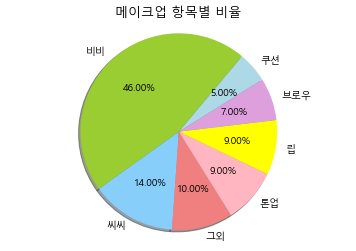

In [72]:
plt.pie(glowpick_makeup['makeup_category'].value_counts(),
        labels = list(glowpick_makeup['makeup_category'].value_counts().index),
        colors=group_colors,
        autopct='%1.2f%%',
        shadow=True,
        startangle=50)
plt.title('메이크업 항목별 비율',fontsize=13)
plt.axis('equal')

# 헤어 / 바디 항목별 비율

In [75]:
glowpick_hair_body['hairbody_category'] = np.nan
glowpick_hair_body['hairbody_category'].loc[샴푸_idx]='샴푸'
glowpick_hair_body['hairbody_category'].loc[컨디셔너_idx]='컨디셔너'
glowpick_hair_body['hairbody_category'].loc[트리트먼트_idx]='트리트먼트'
glowpick_hair_body['hairbody_category'].loc[바디워시_idx]='바디워시'
glowpick_hair_body['hairbody_category'].loc[스프레이_바디_idx]='스프레이'
glowpick_hair_body['hairbody_category'].loc[샤워젤_idx]='샤워젤'
glowpick_hair_body['hairbody_category'].loc[오일_idx]='오일'
glowpick_hair_body['hairbody_category'].loc[데오드란트_idx]='데오드란트'
glowpick_hair_body['hairbody_category'].loc[로션_idx]='로션'
glowpick_hair_body['hairbody_category'].loc[헤어바디_그외_idx]='그외'


#'샴푸' ,'컨디셔너' ,'트리트먼트' ,'바디워시' ,'스프레이','샤워젤','오일','데오드란트','로션'

In [76]:
glowpick_hair_body['hairbody_category'].value_counts().index

Index(['샴푸', '바디워시', '스프레이', '샤워젤', '데오드란트', '로션', '그외', '트리트먼트', '컨디셔너',
       '오일'],
      dtype='object')

In [106]:
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightpink','antiquewhite','plum','lightblue','yellow','azure','linen']

([<matplotlib.patches.Wedge at 0x1ac122670f0>,
 [Text(0.38342925591520244, 1.0310101870051112, '샴푸'),
  Text(-0.9225376079123462, 0.599102964428792, '바디워시'),
  Text(-0.9526279699102401, -0.5499999554042662, '스프레이'),
  Text(-0.2511860142746747, -1.0709367797553706, '샤워젤'),
  Text(0.4890986408316228, -0.9852829641969151, '데오드란트'),
  Text(0.9409006530987445, -0.5698297649284005, '로션'),
  Text(1.093974077100236, -0.11498138385272287, '그외'),
  Text(1.082615183219665, 0.19479313402235554, '트리트먼트'),
  Text(1.026938500057463, 0.394204663975109, '컨디셔너'),
  Text(0.969433839490749, 0.5198057626173691, '오일')],
 [Text(0.20914323049920133, 0.5623691929118788, '22.00%'),
  Text(-0.5032023315885524, 0.32678343514297736, '21.00%'),
  Text(-0.5196152563146763, -0.29999997567505426, '14.00%'),
  Text(-0.13701055324073164, -0.5841473344120203, '12.00%'),
  Text(0.2667810768172488, -0.5374270713801355, '10.00%'),
  Text(0.5132185380538606, -0.31081623541549114, '8.00%'),
  Text(0.596713132963765, -0.062717

Text(0.5, 1.0, '헤어/바디 항목별 비율')

(-1.1159004613840247,
 1.1025950902669737,
 -1.1091124155199539,
 1.1223160152485896)

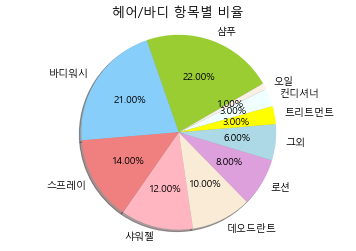

In [107]:
plt.pie(glowpick_hair_body['hairbody_category'].value_counts(),
        labels = list(glowpick_hair_body['hairbody_category'].value_counts().index),
        colors=group_colors,
        autopct='%1.2f%%',
        shadow=True,
        startangle=30)
plt.title('헤어/바디 항목별 비율',fontsize=13)
plt.axis('equal')

# 헤어스타일링 항목별 비율

In [96]:
glowpick_hairstyle['hairstyle_category'] = np.nan
glowpick_hairstyle['hairstyle_category'].loc[왁스_idx]='왁스'
glowpick_hairstyle['hairstyle_category'].loc[스프레이_헤어_idx]='스프레이'
glowpick_hairstyle['hairstyle_category'].loc[컬_idx]='컬'
glowpick_hairstyle['hairstyle_category'].loc[포마드_idx]='포마드'
glowpick_hairstyle['hairstyle_category'].loc[다운펌_idx]='다운'
glowpick_hairstyle['hairstyle_category'].loc[헤어스타일링_그외_idx]='그외'


#'왁스' ,'스프레이' ,'컬' ,'포마드' ,'다운'

In [97]:
glowpick_hairstyle['hairstyle_category'].value_counts().index

Index(['왁스', '포마드', '스프레이', '다운', '컬', '그외'], dtype='object')

In [108]:
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral','lightpink','yellow','antiquewhite']

([<matplotlib.patches.Wedge at 0x1ac121efac8>,
 [Text(-0.7939361881787749, 0.7613575566710801, '왁스'),
  Text(0.023036468294022387, -1.0997587558771873, '포마드'),
  Text(0.9225375237742357, -0.5991030939900924, '스프레이'),
  Text(1.0997587553379795, 0.023036494035734496, '다운'),
  Text(1.0682477492335973, 0.2623866350585596, '컬'),
  Text(1.000159794014045, 0.4579087097203798, '그외')],
 [Text(-0.43305610264296807, 0.4152859400024073, '59.00%'),
  Text(0.012565346342194028, -0.5998684122966476, '16.00%'),
  Text(0.5032022856950377, -0.32678350581277765, '15.00%'),
  Text(0.5998684120025342, 0.012565360383127907, '4.00%'),
  Text(0.582680590491053, 0.1431199827592143, '3.00%'),
  Text(0.5455417058258427, 0.24976838712020713, '3.00%')])

Text(0.5, 1.0, '헤어스타일링 항목별 비율')

(-1.1125577646696259,
 1.1012875345729942,
 -1.1040431807377118,
 1.1121317088375273)

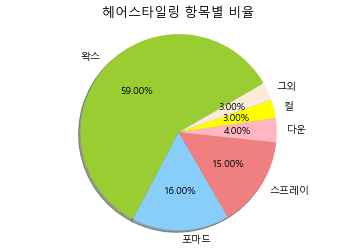

In [110]:
plt.pie(glowpick_hairstyle['hairstyle_category'].value_counts(),
        labels = list(glowpick_hairstyle['hairstyle_category'].value_counts().index),
        colors=group_colors,
        autopct='%1.2f%%',
        shadow=True,
        startangle=30)
plt.title('헤어스타일링 항목별 비율',fontsize=13)
plt.axis('equal')